<a href="https://colab.research.google.com/github/ninjamango/samplerepo/blob/main/BASE_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy
!pip install tensorflow
!pip install keras
!pip install scikit-learn
!pip install imageio
!pip install pandas
!pip install numpy
!pip install opencv-python
!pip install matplotlib
!pip install scikit-image
!pip install pillow
!pip install seaborn


In [7]:
import scipy
import random
import imageio

import tensorflow as tf
from tensorflow.keras.utils import to_categorical, plot_model

from tensorflow.python.tools import freeze_graph, optimize_for_inference_lib
from tensorflow.keras.applications.inception_v3 import InceptionV3

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD, RMSprop, Adam


In [9]:
xs = []
ys = []
def Load_data_malignant():
    path ="Dataset_Final/malignant"
    x_out = []
    y_out = []
    for i in range(1, 1500):
        img = imageio.imread(path +'/' + str(i) + '.jpg')
        lab = 1
        x_out.append(img)
        y_out.append(lab)
    return x_out, y_out

In [10]:
def Load_data_benign():
    path ="Dataset_Final/benign"
    x_out = []
    y_out = []
    for i in range(1, 1800):
        img = imageio.imread(path +'/' + str(i) + '.jpg')
        lab = 0
        x_out.append(img)
        y_out.append(lab)
    return x_out, y_out

In [11]:
x_0, y_0 = Load_data_benign()

<ipython-input-10-d3e5e9973df9>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path +'/' + str(i) + '.jpg')


In [12]:
x_1, y_1 = Load_data_malignant()

<ipython-input-9-97270fdbc921>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path +'/' + str(i) + '.jpg')


In [13]:
x_0 = np.array(x_0)
y_0 = np.array(y_0)

x_1 = np.array(x_1)
y_1 = np.array(y_1)


In [15]:
# num_classes = 2
# x=np.concatenate((x_0, x_1), axis=0)
# y=np.concatenate((y_0, y_1), axis=0)

# y = np_utils.to_categorical(y, num_classes)


from tensorflow.keras.utils import to_categorical

num_classes = 2
x = np.concatenate((x_0, x_1), axis=0)
y = np.concatenate((y_0, y_1), axis=0)

y = to_categorical(y, num_classes)


In [16]:
x_train, x_Test, y_train, y_Test = train_test_split(x, y, test_size=0.3, random_state=5,stratify=y)

In [17]:
nClasses = 2

def createModel():
    model = Sequential()

    model.add(Conv2D(15, (3, 3), padding='valid', activation='relu', input_shape=(224,224,3)))
    model.add(BatchNormalization())

    model.add(Conv2D(15, (3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(15, (3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(15, (3, 3), padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(nClasses, activation='softmax'))
    model.summary()

    return model

In [19]:
from tensorflow.keras import optimizers

model1 = createModel()
batch_size = 40
epochs = 150

# Updated Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99, epsilon=None)

model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 15)        │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 222, 222, 15)        │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 15)        │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 222, 222, 15)        │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 15)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 111, 111, 15)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 111, 111, 15)        │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 111, 111, 15)        │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 55, 55, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 55, 55, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 53, 53, 15)          │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 53, 53, 15)          │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10140)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │       1,014,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,021,082 (3.90 MB)

 Trainable params: 1,020,962 (3.89 MB)

 Non-trainable params: 120 (480.00 B)

In [32]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=1e-5),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

# Train the model
history = model1.fit(
    x_train,
    y_train,
    epochs=150,
    batch_size=batch_size,
    validation_data=(x_Test, y_Test),
    shuffle=True,
    callbacks=callbacks
)

Epoch 1/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6970 - loss: 1.1049
Epoch 1: val_loss improved from inf to 0.58619, saving model to best_model.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 456s 7s/step - accuracy: 0.6976 - loss: 1.1009 - val_accuracy: 0.6949 - val_loss: 0.5862 - learning_rate: 0.0010
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8000 - loss: 0.4196
Epoch 2: val_loss did not improve from 0.58619
58/58 ━━━━━━━━━━━━━━━━━━━━ 465s 7s/step - accuracy: 0.8001 - loss: 0.4196 - val_accuracy: 0.6444 - val_loss: 1.3709 - learning_rate: 0.0010
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8394 - loss: 0.3337
Epoch 3: val_loss did not improve from 0.58619
58/58 ━━━━━━━━━━━━━━━━━━━━ 421s 7s/step - accuracy: 0.8391 - loss: 0.3341 - val_accuracy: 0.6263 - val_loss: 1.4027 - learning_rate: 0.0010
Epoch 4/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8367 - loss: 0.3463
Epoch 4: val_loss did not improve from 0.58619
58/58 ━━━━━━━━━━━━━━━━

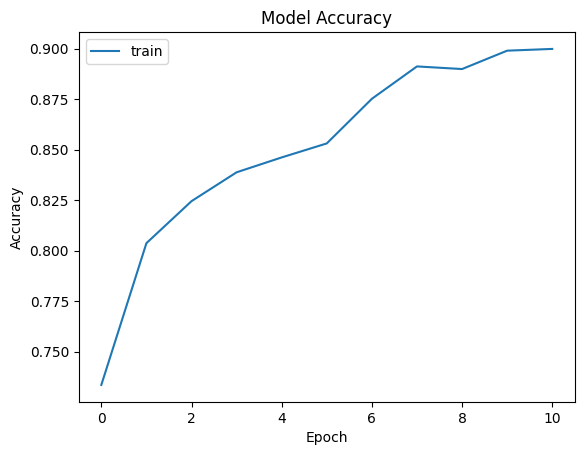

In [34]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()


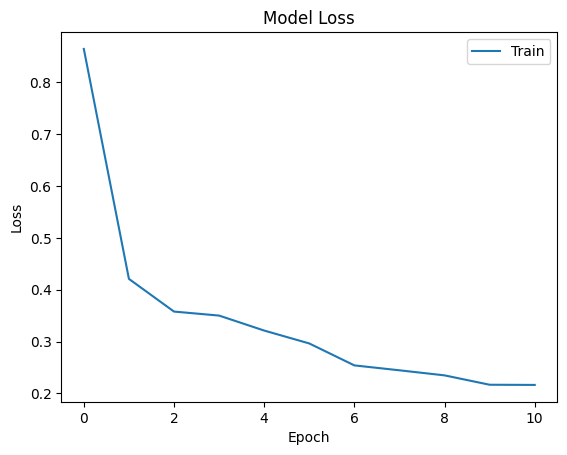

In [35]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


In [37]:
from sklearn.metrics import classification_report
pred = model1.predict(x_Test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_Test, axis=1), predicted)
print(report)

31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       540
           1       0.73      0.52      0.61       450

    accuracy                           0.69       990
   macro avg       0.70      0.68      0.68       990
weighted avg       0.70      0.69      0.69       990



In [39]:
from PIL import Image
import numpy as np
import os

# Create directories in the Colab environment
os.makedirs('/content/final/benign', exist_ok=True)
os.makedirs('/content/final/malignant', exist_ok=True)

# Iterate through the predictions
for i in range(989):
    # Check if the difference between the prediction probabilities is below the threshold
    if abs((pred[i][0] * 100) - (pred[i][1] * 100)) < 99.99995:
        img = Image.fromarray(x_Test[i].astype(np.uint8), 'RGB')
        # Save the image based on the true label
        if np.argmax(y_Test[i]) == 0:
            img.save(os.path.join('/content/final/benign/', str(i) + '.jpg'))
        elif np.argmax(y_Test[i]) == 1:
            img.save(os.path.join('/content/final/malignant/', str(i) + '.jpg'))
